In [1]:
import torch
import torch.nn as nn

https://colab.research.google.com/drive/109gHWFUlUzuwhgXROpzIuVoSPZA_qeoy#scrollTo=zcms4BCySKXj

### <span style="color:blue">1. Pobranie baza danych csv</span>
Zacznijmy od utworzenia przykładowych danych za pomocą torch.

In [2]:
import pandas as pd
df = pd.read_csv('c:/1/2014_ebola.csv', usecols=[1,2,3,4,5])
df.head(13)

,Month,Year,Lat,Lon,Value
0,3,14,9.95,-9.70,122.0
1,4,14,9.95,-9.70,224.0
2,5,14,9.95,-9.70,291.0
3,6,14,9.95,-9.70,413.0
4,7,14,9.95,-9.70,460.0
5,8,14,9.95,-9.70,771.0
6,9,14,9.95,-9.70,1022.0
7,10,14,9.95,-9.70,NaN
8,11,14,9.95,-9.70,NaN
9,12,14,9.95,-9.70,NaN


In [3]:
df.shape

(31, 5)

### <span style="color:blue">2. Usuwanie pustych komórek NaN </span>
Sieci nieuronowe nie lubiś pustych komórek NaN

In [4]:
df = df.dropna(how ='any')
df.isnull().sum()

Month    0
Year     0
Lat      0
Lon      0
Value    0
dtype: int64

### <span style="color:blue">3. Przekształcanie na tensor zmiennych niezależnych</span>

In [5]:
X = torch.tensor((df.Month, df.Year, df.Lat, df.Lon), dtype=torch.float)
X

tensor([[  3.0000,   4.0000,   5.0000,   6.0000,   7.0000,   8.0000,   9.0000,
           4.0000,   5.0000,   6.0000,   7.0000,   8.0000,   9.0000,  10.0000,
          11.0000,   8.0000,   9.0000,   5.0000,   6.0000,   7.0000,   8.0000,
           9.0000],
        [ 14.0000,  14.0000,  14.0000,  14.0000,  14.0000,  14.0000,  14.0000,
          14.0000,  14.0000,  14.0000,  14.0000,  14.0000,  14.0000,  14.0000,
          14.0000,  14.0000,  14.0000,  14.0000,  14.0000,  14.0000,  14.0000,
          14.0000],
        [  9.9500,   9.9500,   9.9500,   9.9500,   9.9500,   9.9500,   9.9500,
           6.4300,   6.4300,   6.4300,   6.4300,   6.4300,   6.4300,  17.5700,
          17.5700,  14.5000,  14.5000,   8.4600,   8.4600,   8.4600,   8.4600,
           8.4600],
        [ -9.7000,  -9.7000,  -9.7000,  -9.7000,  -9.7000,  -9.7000,  -9.7000,
          -9.4300,  -9.4300,  -9.4300,  -9.4300,  -9.4300,  -9.4300,  -4.0000,
          -4.0000, -14.4500, -14.4500, -11.7800, -11.7800, -11.7800, -1

#### <span style="color:blue"> 3.1 TRansponuje wektor zmiennych niezależnych aby stał się kolumną</span>

In [6]:
X = torch.transpose(X.flip(0),0,1)
X

tensor([[ -9.7000,   9.9500,  14.0000,   3.0000],
        [ -9.7000,   9.9500,  14.0000,   4.0000],
        [ -9.7000,   9.9500,  14.0000,   5.0000],
        [ -9.7000,   9.9500,  14.0000,   6.0000],
        [ -9.7000,   9.9500,  14.0000,   7.0000],
        [ -9.7000,   9.9500,  14.0000,   8.0000],
        [ -9.7000,   9.9500,  14.0000,   9.0000],
        [ -9.4300,   6.4300,  14.0000,   4.0000],
        [ -9.4300,   6.4300,  14.0000,   5.0000],
        [ -9.4300,   6.4300,  14.0000,   6.0000],
        [ -9.4300,   6.4300,  14.0000,   7.0000],
        [ -9.4300,   6.4300,  14.0000,   8.0000],
        [ -9.4300,   6.4300,  14.0000,   9.0000],
        [ -4.0000,  17.5700,  14.0000,  10.0000],
        [ -4.0000,  17.5700,  14.0000,  11.0000],
        [-14.4500,  14.5000,  14.0000,   8.0000],
        [-14.4500,  14.5000,  14.0000,   9.0000],
        [-11.7800,   8.4600,  14.0000,   5.0000],
        [-11.7800,   8.4600,  14.0000,   6.0000],
        [-11.7800,   8.4600,  14.0000,   7.0000],


Ma mieć 22 obserwacje i jeden wymiar wynikowy

<span style="color:green">torch.Size([22, 4])</span>

In [7]:
X.size()

torch.Size([22, 4])

### <span style="color:blue">4. Przekształcanie na tensor zmiennych zależnych</span>

In [8]:
y = torch.tensor((df.Value), dtype=torch.float)
y

tensor([1.2200e+02, 2.2400e+02, 2.9100e+02, 4.1300e+02, 4.6000e+02, 7.7100e+02,
        1.0220e+03, 3.5000e+01, 1.3000e+01, 1.0700e+02, 3.2900e+02, 1.3950e+03,
        3.3620e+03, 1.0000e+00, 8.0000e+00, 1.0000e+00, 3.0000e+00, 5.0000e+01,
        2.3900e+02, 5.3300e+02, 1.2160e+03, 1.9400e+03])

#### <span style="color:blue"> 4.1 TRansponuje wektor wynikowy aby stał się kolumną</span>

In [9]:
y = y.view(y.shape[0],1)

In [10]:
y

tensor([[1.2200e+02],
        [2.2400e+02],
        [2.9100e+02],
        [4.1300e+02],
        [4.6000e+02],
        [7.7100e+02],
        [1.0220e+03],
        [3.5000e+01],
        [1.3000e+01],
        [1.0700e+02],
        [3.2900e+02],
        [1.3950e+03],
        [3.3620e+03],
        [1.0000e+00],
        [8.0000e+00],
        [1.0000e+00],
        [3.0000e+00],
        [5.0000e+01],
        [2.3900e+02],
        [5.3300e+02],
        [1.2160e+03],
        [1.9400e+03]])

Ma mieć 22 obserwacje i jeden wymiar wynikowy

<span style="color:green">torch.Size([22, 1])</span>

In [11]:
y.size()

torch.Size([22, 1])

#### Sprawdzam czy wyniki tensorów są OK

In [12]:
print('Tensor zmiennych opisujących:', X.size())
print('Tensor zmiennych wynikowych: ',y.size())

Tensor zmiennych opisujących: torch.Size([22, 4])
Tensor zmiennych wynikowych:  torch.Size([22, 1])


#### Wartość xPredicted

Zmienna xPredicted jest pojedynczym wejściem, dla którego chcemy przewidzieć ocenę z wykorzystaniem parametrów wyuczonych przez sieć neuronową.

In [13]:
xPredicted = torch.tensor(([6, 14, 6.43, -9.70]), dtype=torch.float)
print('Tensor zmiennych do prognozy: ',xPredicted.size())

Tensor zmiennych do prognozy:  torch.Size([4])


#### Sprawdzam czy wymiary tensorów są OK

Tensor zmiennych opisujących   : torch.Size([22, 4])

Tensor zmiennych wynikowych    : torch.Size([22, 1])

Tensor 1 obserwacji do prognozy: torch.Size([4])

In [14]:
print('Tensor zmiennych opisujących   :',X.size())
print('Tensor zmiennych wynikowych    :',y.size())
print('Tensor 1 obserwacji do prognozy:',xPredicted.size())

Tensor zmiennych opisujących   : torch.Size([22, 4])
Tensor zmiennych wynikowych    : torch.Size([22, 1])
Tensor 1 obserwacji do prognozy: torch.Size([4])


### Skalowanie i normalizacja
Dane przetwarzane przez sieć pochodzą najczęściej z obserwacji pewnych wartości w badanym modelu. Ich skala wartości zazwyczaj nie na bezpośrednie wprowadzenie na wejścia sieci. Istnieje kilka popularnych metod skalowania: 

skalowanie względem wartości maksymalnej: 

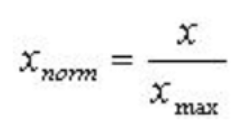


### Skalowanie wartości X

In [15]:
# scale units
X_max, _ = torch.max(X, 0)
X = torch.div(X, X_max)


print(X)

tensor([[2.4250, 0.5663, 1.0000, 0.2727],
        [2.4250, 0.5663, 1.0000, 0.3636],
        [2.4250, 0.5663, 1.0000, 0.4545],
        [2.4250, 0.5663, 1.0000, 0.5455],
        [2.4250, 0.5663, 1.0000, 0.6364],
        [2.4250, 0.5663, 1.0000, 0.7273],
        [2.4250, 0.5663, 1.0000, 0.8182],
        [2.3575, 0.3660, 1.0000, 0.3636],
        [2.3575, 0.3660, 1.0000, 0.4545],
        [2.3575, 0.3660, 1.0000, 0.5455],
        [2.3575, 0.3660, 1.0000, 0.6364],
        [2.3575, 0.3660, 1.0000, 0.7273],
        [2.3575, 0.3660, 1.0000, 0.8182],
        [1.0000, 1.0000, 1.0000, 0.9091],
        [1.0000, 1.0000, 1.0000, 1.0000],
        [3.6125, 0.8253, 1.0000, 0.7273],
        [3.6125, 0.8253, 1.0000, 0.8182],
        [2.9450, 0.4815, 1.0000, 0.4545],
        [2.9450, 0.4815, 1.0000, 0.5455],
        [2.9450, 0.4815, 1.0000, 0.6364],
        [2.9450, 0.4815, 1.0000, 0.7273],
        [2.9450, 0.4815, 1.0000, 0.8182]])


### Skalowanie wartości y i wartości pod którą szukamy prognozy

In [16]:
xPredicted_max, _ = torch.max(xPredicted, 0)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100
print(xPredicted)
print(y)

tensor([ 0.4286,  1.0000,  0.4593, -0.6929])
tensor([[1.2200e+00],
        [2.2400e+00],
        [2.9100e+00],
        [4.1300e+00],
        [4.6000e+00],
        [7.7100e+00],
        [1.0220e+01],
        [3.5000e-01],
        [1.3000e-01],
        [1.0700e+00],
        [3.2900e+00],
        [1.3950e+01],
        [3.3620e+01],
        [1.0000e-02],
        [8.0000e-02],
        [1.0000e-02],
        [3.0000e-02],
        [5.0000e-01],
        [2.3900e+00],
        [5.3300e+00],
        [1.2160e+01],
        [1.9400e+01]])


#### DEFINIOWANIE MODELU

In [17]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 4   # ---Tyle ile jest obserwacji (kolumn po trnspozycji macierzy X)
        self.outputSize = 1
        self.hiddenSize = 4  # ---Tyle ile jest obserwacji (kolumn po trnspozycji macierzy X)
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 6 X 4 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 6 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))      

### Trening
Pozostało już tylko trenować sieć neuronową. Najpierw tworzymy instancję wykresu obliczeniowego, który właśnie zbudowaliśmy:

In [18]:
NN = Neural_Network()

In [19]:
X.size()

torch.Size([22, 4])

In [20]:
y.size()

torch.Size([22, 1])

Następnie trenujemy model do 150 rund. Zauważ, że w PyTorch NN(X) automatycznie wywołuje funkcję forward, więc nie ma potrzeby jawnego wywoływania NN.forward(X).

Po uzyskaniu przewidywanego wyniku dla każdej rundy szkolenia, obliczamy stratę za pomocą następującego kodu:

In [21]:
torch.mean((y - NN(X))**2).detach().item()

87.79571533203125

In [22]:
NN = Neural_Network()
for i in range(150):  # trains the NN 150 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    NN.train(X, y)
NN.saveWeights(NN)
NN.predict()

#0 Loss: 88.52689361572266
#1 Loss: 85.6364974975586
#2 Loss: 85.6364974975586
#3 Loss: 85.6364974975586
#4 Loss: 85.6364974975586
#5 Loss: 85.6364974975586
#6 Loss: 85.6364974975586
#7 Loss: 85.6364974975586
#8 Loss: 85.6364974975586
#9 Loss: 85.6364974975586
#10 Loss: 85.6364974975586
#11 Loss: 85.6364974975586
#12 Loss: 85.6364974975586
#13 Loss: 85.6364974975586
#14 Loss: 85.6364974975586
#15 Loss: 85.6364974975586
#16 Loss: 85.6364974975586
#17 Loss: 85.6364974975586
#18 Loss: 85.6364974975586
#19 Loss: 85.6364974975586
#20 Loss: 85.6364974975586
#21 Loss: 85.6364974975586
#22 Loss: 85.6364974975586
#23 Loss: 85.6364974975586
#24 Loss: 85.6364974975586
#25 Loss: 85.6364974975586
#26 Loss: 85.6364974975586
#27 Loss: 85.6364974975586
#28 Loss: 85.6364974975586
#29 Loss: 85.6364974975586
#30 Loss: 85.6364974975586
#31 Loss: 85.6364974975586
#32 Loss: 85.6364974975586
#33 Loss: 85.6364974975586
#34 Loss: 85.6364974975586
#35 Loss: 85.6364974975586
#36 Loss: 85.6364974975586
#37 Loss: 

C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Neural_Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Predicted data based on trained weights: 
Input (scaled): 
tensor([ 0.4286,  1.0000,  0.4593, -0.6929])
Output: 
tensor([1.])
